scieżka krytyczna:
[
    "a",
    "b",
    "d",
    "g",
    "h"
]
poglądowy graf:


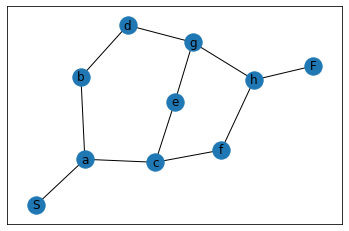

In [3]:
import networkx as nx
import matplotlib.pyplot as plt
import json

class GraphVisualization:
   
    def __init__(self):
          
        # visual is a list which stores all the set of edges that constitutes a graph
        self.visual = []
          
    # addEdge function inputs the vertices of an edge and appends it to the visual list
    def addEdge(self, a, b):
        temp = [a, b]
        self.visual.append(temp)
          
    # In visualize function G is an object of class Graph given by networkx G.add_edges_from(visual)
    # creates a graph with a given list nx.draw_networkx(G) - plots the graph plt.show() - displays the graph
    def visualize(self):
        G = nx.Graph()
        G.add_edges_from(self.visual)
        nx.draw_networkx(G)
        plt.show()

def calculate_critical_path(data):
    critical_path = []
    for activity in data:
        predecessors = activity['predecessors']
        if not predecessors:
            es = 0
            ef = activity['duration'] + es
        elif predecessors:
            ef_list = [d['ef'] for d in data if d['activity'] in predecessors]
            es = max(ef_list)
            ef = es + activity['duration']
        activity['es'] = es
        activity['ef'] = ef
    for index, dactivity in enumerate(reversed(data)):
        durations = []
        if index == 0:
            dactivity['lf'] = dactivity['ef']
        else:
            items = [ditem for ditem in data if dactivity['activity'] in ditem['predecessors']]
            durations = []
            for ditem in items:
                durations.append(ditem['ls'])
            dactivity['lf'] = min(durations)
        dactivity['ls'] = dactivity['lf'] - dactivity['duration']
        dactivity['slack'] = dactivity['lf'] -  dactivity['ef']
    for item in data:
        if item['slack'] == 0:
            critical_path.append(item['activity'])
    return critical_path

D = GraphVisualization()

def path():
    
    x=len(data)

    for i in range(0,x):
        y = len(data[i]['predecessors'])
        if(y==0):
             D.addEdge('S',data[i]['activity'])
        for j in range(0,y):
            D.addEdge(data[i]['activity'],data[i]['predecessors'][j])


    x=len(data)
    t=False
    k=0

    for k in range(0,x):
        t=True
        fin=data[k]['activity']

        for i in range(0,x):
            y = len(data[i]['predecessors'])
            for j in range(0,y):
                if(fin==data[i]['predecessors'][j]):
                    t=False

        if(t):
            D.addEdge(fin,"F")


def finish():
    path()
    critical_path = calculate_critical_path(data)
    print("scieżka krytyczna:")
    print(json.dumps(critical_path, indent=4, sort_keys=True))
    print("poglądowy graf:")
    D.visualize()


data = [
    {
        'activity': 'a',
        "duration": 3,
        "predecessors": []
    },
    {
        'activity': 'b',
        "duration": 4,
        "predecessors": ['a']
    },
    {
        'activity': 'c',
        "duration": 2,
        "predecessors": ['a']
    },
    {
        'activity': 'd',
        "duration": 5,
        "predecessors": ['b']
    },
    {
        'activity': 'e',
        "duration": 1,
        "predecessors": ['c']
    },
    {
        'activity': 'f',
        "duration": 2,
        "predecessors": ['c']
    },
    {
        'activity': 'g',
        "duration": 4,
        "predecessors": ['d', 'e']
    },
    {
        'activity': 'h',
        "duration": 3,
        "predecessors": ['f', 'g']
    }
]

finish()